In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn
import os
import io
import math

In [12]:
def read_plaket(path, file_name, chains, conf_max):
    data = []
    for chain in chains:
        for i in range(conf_max+1):
            file_path = f'{path}/{chain}/{file_name}_{i:04}'
            # print(file_path)
            if (os.path.isfile(file_path)):
                data.append(pd.read_csv(file_path))
                data[-1]['conf'] = i
                data[-1]['chain'] = chain
    return pd.concat(data)

def plot_plaket_therm(data):
    # data = data[data['conf'] >= 0]
    # data = data[data['conf'] <= 100]
    fg = seaborn.FacetGrid(data=data, hue='chain', height=5, aspect=1.2)
    fg.map(plt.plot, 'conf', 'polyakov_loop', linestyle='None', marker='o').add_legend()
    # plt.yscale('log')
    # plt.xscale('log')

def plaket_mean(data):
    # data = data[data['conf'] >= 40]
    n = data['plaket'].size
    result =  data['plaket'].agg([np.mean, np.std])
    result['std'] = result['std'] / math.sqrt(n)
    return result

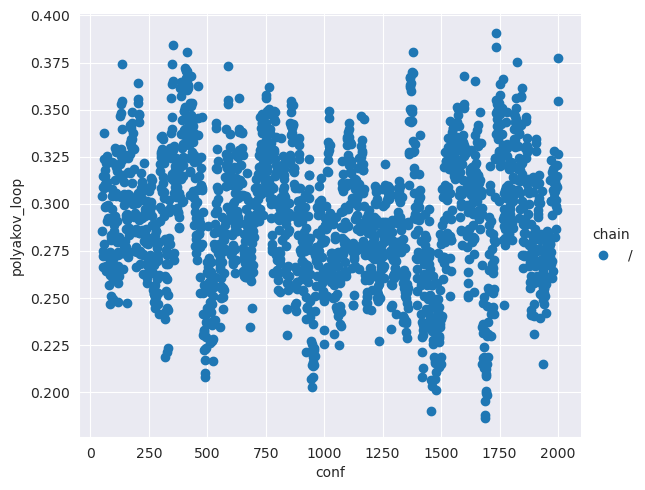

In [15]:
chains = ['/']
data = read_plaket('../data/smearing/polyakov_loop/su2/qc2dstag/32^3x16/mu0.15/original/HYP10_alpha=1_1_0.5', 'polyakov_loop', chains, 9999)
data = data[data['HYP_step'] == 9]
data = data[data['conf'] >= 20]
plot_plaket_therm(data)

In [ ]:
def read_data_polyakov_loops(paths):
    data = []
    for path in paths:
        data.append(pd.read_csv(path[0], index_col=None, names=["conf_num", "polyakov_loop"]))
        data[-1]['mu'] = path[1]

    return pd.concat(data)

def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass

    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

def polyakov_loop(paths, image_path, image_name):
    data = read_data_polyakov_loops(paths)
    data = data.groupby(['mu'])['polyakov_loop'].agg([('polyakov_loop', np.mean), ('err', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index()

    print(data)

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.61)
    fg.map(plt.errorbar, 'mu', 'polyakov_loop', 'err', marker="o", fmt='', linestyle = '').add_legend()
    fg.fig.suptitle(image_name)
    plt.show()

    save_image(image_path, image_name, fg)




     mu  polyakov_loop       err
0  0.00   7.580179e-05  0.000069
1  0.05   7.580179e-05  0.000069
2  0.25  -6.633632e-05  0.000075
3  0.35  -4.935646e-06  0.000075
4  0.45  -5.483899e-07  0.000095


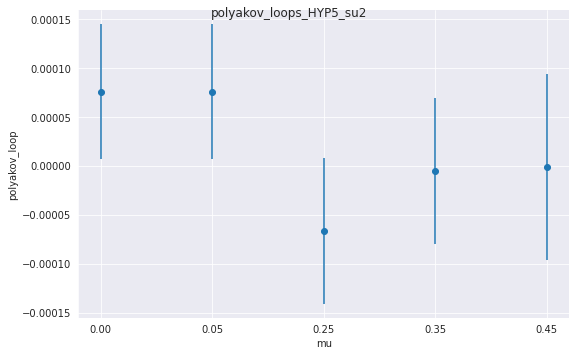

In [35]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_su2', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_su2', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_su2', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_su2', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_su2', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison/HYP5_alpha=1_1_0.5_APE0_alpha=0.5', 'polyakov_loops_HYP5_su2')

     mu  polyakov_loop       err
0  0.00       0.001797  0.000982
1  0.05       0.001797  0.000982
2  0.25       0.001279  0.000366
3  0.35       0.029019  0.000827
4  0.45       0.130412  0.001220


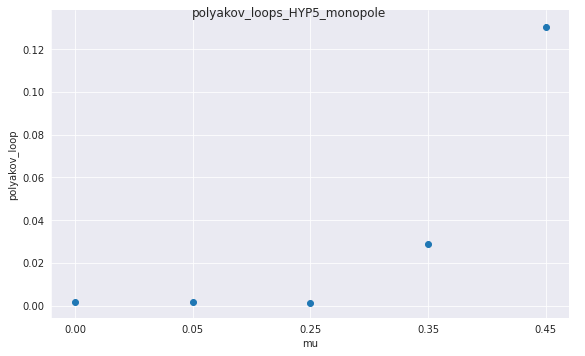

In [36]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopole', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopole', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopole', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopole', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopole', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison/HYP5_alpha=1_1_0.5_APE0_alpha=0.5', 'polyakov_loops_HYP5_monopole')

     mu  polyakov_loop       err
0  0.00      -0.000078  0.000073
1  0.05      -0.000078  0.000073
2  0.25      -0.000069  0.000043
3  0.35      -0.000013  0.000076
4  0.45       0.000200  0.000187


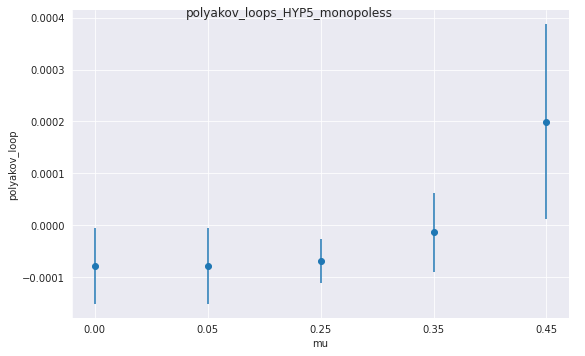

In [37]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopoless', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopoless', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopoless', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopoless', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/HYP5_alpha=1_1_0.5_APE0_alpha=0.5/polyakov_loops_monopoless', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison/HYP5_alpha=1_1_0.5_APE0_alpha=0.5', 'polyakov_loops_HYP5_monopoless')

     mu  polyakov_loop       err
0  0.00       0.000076  0.000069
1  0.05       0.000017  0.000042
2  0.25      -0.000066  0.000075
3  0.35      -0.000029  0.000060
4  0.45       0.000014  0.000070


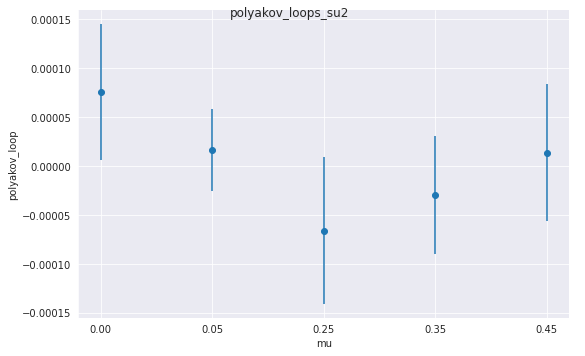

In [32]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/polyakov_loops_su2', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.05/polyakov_loops_su2', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/polyakov_loops_su2', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/polyakov_loops_su2', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/polyakov_loops_su2', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison', 'polyakov_loops_su2')

     mu  polyakov_loop       err
0  0.00       0.000799  0.000571
1  0.05       0.001279  0.000366
2  0.25       0.001279  0.000366
3  0.35       0.017296  0.000489
4  0.45       0.130662  0.001189


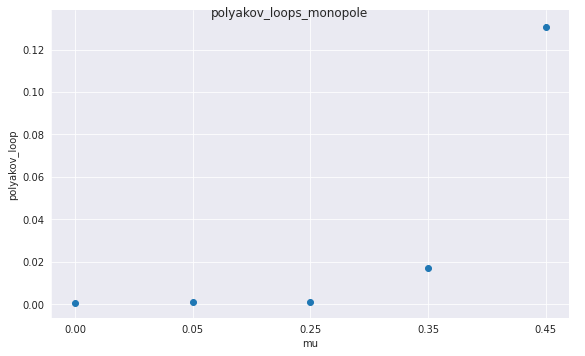

In [33]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/polyakov_loops_monopole', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.05/polyakov_loops_monopole', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/polyakov_loops_monopole', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/polyakov_loops_monopole', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/polyakov_loops_monopole', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison', 'polyakov_loops_monopole')

     mu  polyakov_loop       err
0  0.00  -7.776727e-05  0.000073
1  0.05  -6.861699e-05  0.000043
2  0.25  -6.861699e-05  0.000043
3  0.35  -6.553819e-07  0.000058
4  0.45  -2.945491e-05  0.000069


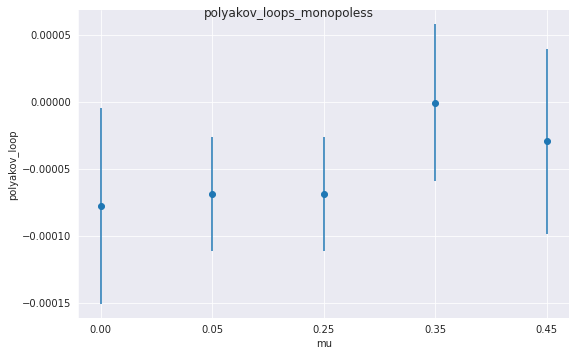

In [34]:
paths = [('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.00/polyakov_loops_monopoless', '0.00'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.05/polyakov_loops_monopoless', '0.05'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.25/polyakov_loops_monopoless', '0.25'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.35/polyakov_loops_monopoless', '0.35'),
        ('../data/polyakov_loop/su2/qc2dstag/40^4/mu0.45/polyakov_loops_monopoless', '0.45')]

polyakov_loop(paths, '../images/polyakov_loop/qc2dstag/40^4/mu_comparison', 'polyakov_loops_monopoless')